# Would you survive Titanic?

RMS Titanic was a British passenger ship that sank in the North
Atlantic Ocean in the early morning hours of April 15, 1912, after
striking an iceberg during her maiden voyage.  The majority of its
passengers died in the accident.  As we will discover, not all of them
had the same chance to survive.

Data about 887 passengers have been collected and randomly divided
into a training and a test set.  The training set includes 710 samples
and is stored in the file `titanic-train.txt`, while the test set
is composed of 177 cases and is stored in `titanic-test.txt`.
Each row in the files represents a different passenger, and reports the
following features:
- the ticket class (1st, 2nd or 3rd);
- sex ($0 \to$ male, $1 \to$ female);
- age, in years;
- number of siblings and spouses aboard;
- number of parents and children aboard;
- the passenger fare.

The last column reports whether the passenger survived (1) or not (0).
The files can be obtained by executing the following cell.

In [50]:
!wget -q -O titanic-train.txt https://pastebin.com/raw/LDhY3ZTN
!wget -q -O titanic-test.txt https://pastebin.com/raw/zGsE0ZJ6
!ls *.txt

titanic-test.txt  titanic-train.txt


Training data is then loaded and converted to tensors of features and class labels:

In [51]:
import torch
import matplotlib.pyplot as plt


f = open("titanic-train.txt")
data = [float(x) for x in f.read().split()]
f.close()

data = torch.tensor(data).view(-1, 7)

X = data[:, :6]
Y = data[:, 6].long()

print(X.shape, X.dtype)
print(Y.shape, Y.dtype)

torch.Size([710, 6]) torch.float32
torch.Size([710]) torch.int64


## Training a model

Define and train a logistic regression model for the Titanic data. First, define the inference function computing the probability estimates that input features belong to class 1:

In [52]:
def logreg_inference(w, b, X):
    return torch.sigmoid(X @ w + b)

Then write the training loop. Remember the the main steps:
1. outside the loop define the parameters of the model, and the optimizer (use `torch.optim.SGD`).
2. inside the loop, compute the loss and use the optimizer to update the parameters.

In [53]:
LR = 0.001
STEPS = 500000

w = torch.randn(6, requires_grad=True)
b = torch.randn(1,  requires_grad=True)
print(w)
print(b)
optimizer = torch.optim.SGD([w, b], lr=LR)
loss_fun = torch.nn.BCELoss()

losses = []
steps = []

for step in range(STEPS):
    optimizer.zero_grad()

    #prediction
    y_pred = logreg_inference(w, b, X)
    y_pred = y_pred.clamp(0.001, 0.999)

    loss = loss_fun(y_pred, Y.float())

    loss.backward()
    optimizer.step()
    accuracy = (y_pred > 0.5).long()
    accuracy = (accuracy == Y).float().mean()
    if step % 1000 == 0:
        print(step, loss.item(), (accuracy.item() * 100))
        losses.append(loss.item())
        steps.append(step)

tensor([-0.4975, -0.1450, -0.0302, -0.1286, -0.3211,  0.8726],
       requires_grad=True)
tensor([-1.1575], requires_grad=True)
0 3.192770004272461 39.01408314704895
1000 0.7027782201766968 65.63380360603333
2000 0.6432405114173889 68.16901564598083
3000 0.6103533506393433 69.29577589035034
4000 0.5903992652893066 69.85915303230286
5000 0.5760715007781982 69.9999988079071
6000 0.5644378066062927 70.70422768592834
7000 0.554411768913269 70.84506750106812
8000 0.5455512404441833 70.70422768592834
9000 0.5376332402229309 71.9718337059021
10000 0.5305154323577881 72.95774817466736
11000 0.5240915417671204 73.38027954101562
12000 0.518276035785675 74.64788556098938
13000 0.512997031211853 75.49296021461487
14000 0.5081933736801147 75.49296021461487
15000 0.5038129091262817 76.9014060497284
16000 0.4998100996017456 77.74648070335388
17000 0.49614548683166504 78.0281662940979
18000 0.4927843511104584 79.4366180896759
19000 0.4896965026855469 80.14084696769714
20000 0.4868549704551697 80.42253

Modify the code above to make a list with loss values and training steps
then execute the next cell to plot it.

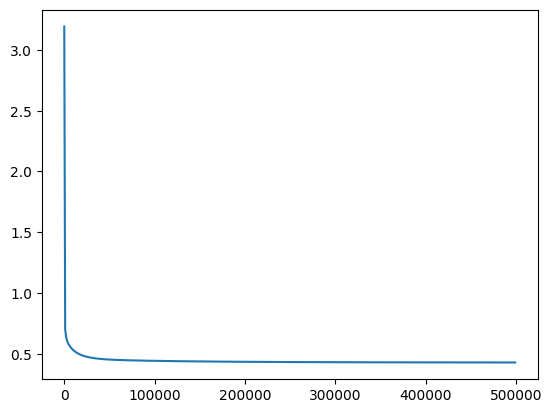

In [54]:
plt.figure()
plt.plot(steps, losses)

Experiment with the code and use the plots to answer the following questions:
1. Which is a good value for the learning rate?
2. How many iterations are required to converge?

## Analyze the model

Modify the script so that you can answer to the questions.

Q1: What would be your probability to survive?  (Make a guess about the ticket class, the fare etc.)

In [55]:
vector_me = [1, 0, 21, 1, 0, 23] # class, gender, age, siblings&spouses, parents&children, fare
vector_me = torch.tensor(vector_me, dtype=torch.float32)
outcome = logreg_inference(w, b, vector_me)
print(f"Probability of survival: {(outcome.item()* 100):.4f}%")

Probability of survival: 50.1758%


Q2: What is the *training accuracy* of the trained model?

In [56]:
y_pred = logreg_inference(w, b, X)
predictions = (y_pred > 0.5).long()
accuracy = (predictions == Y).float().mean()
print(f"Training accuracy: {(accuracy * 100):.4f}%")

Training accuracy: 80.4225%


Q3: Looking at the learned weights, how the individual features
  influence the probability of surviving?

In [57]:
for value in w:
  print(f"Weight w: {value.item():.4f}")


print(f"Weight b: {b.item():.4f}")

Weight w: -1.1682
Weight w: 2.7852
Weight w: -0.0414
Weight w: -0.3211
Weight w: -0.0922
Weight w: 0.0019
Weight b: 2.3230


Q4: What kind of passengers was most likely to survive?  And what
  kind to to die?

In [58]:
print(f"The highest chances of survival: {X[y_pred.argmax(0), :]}")

print(f"{(y_pred[y_pred.argmax(0)].item() * 100):.4f}%")

The highest chances of survival: tensor([  1.0000,   1.0000,   2.0000,   1.0000,   2.0000, 151.5500])
97.4325%


In [59]:
print(f"The lowest chances of survival: {X[y_pred.argmin(0), :]}")

print(f"{(y_pred[y_pred.argmin(0)].item() * 100):.4f}%")

The lowest chances of survival: tensor([ 3.0000,  0.0000, 20.0000,  8.0000,  2.0000, 69.5500])
0.9638%


Q5: Draw a scatter plot showing the distribution of the two classes
  in the plane defined by the two most influential features.  Comment
  the plot.

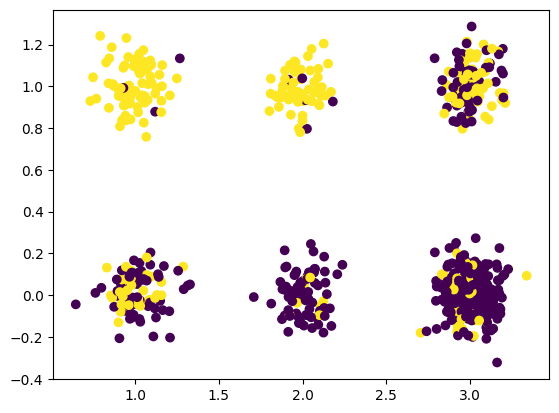

In [60]:
noisy_X = X + torch.randn_like(X) * 0.1
plt.scatter(noisy_X[:, 0], noisy_X[:, 1], c = Y)


## Evaluate the script

Load the test set in the `Xtest` and `Ytest` tensors. Then, answer the questions.

In [65]:
f = open("titanic-test.txt")
data = [float(x) for x in f.read().split()]
f.close()

data = torch.tensor(data).view(-1, 7)
X_Test = data[:, :6]
Y_Test = data[:, 6].long()

print(X_Test.size(), X_Test.dtype)
print(Y_Test.size(), Y_Test.dtype)


torch.Size([177, 6]) torch.float32
torch.Size([177]) torch.int64


Q6: what is the *test accuracy* of the model?

In [71]:
y_pred = logreg_inference(w, b, X_Test)
predictions = (y_pred > 0.5).long()
accuracy_test = (predictions == Y_Test).float().mean()
print(f"Test accuracy: {(accuracy_test * 100):.4f}%")

Test accuracy: 79.6610%


Q7: Is the model overfitting or underfitting the training set?

In [69]:
difference = accuracy_test - accuracy
print(f"Difference accuracy test - accuracy = {(difference*100):.4f}%")
print(f"Accuracy on test dataset: {(accuracy_test*100):.4f}%")
print(f"Accuracy on training dataset: {(accuracy*100):.4f}%")

# slight overfitting of 1,47% --> acceptable


Difference accuracy test - accuracy = -0.7615%
Accuracy on test dataset: 79.6610%
Accuracy on training dataset: 80.4225%


Q8: How can you increase the performance of the model?

To enhance that model we would think that maybe more steps we would have to acquire
to make the training process longer. But as we saw from the plot model was not doing
progress after 20-30k steps, and even if then the progress was unnoticeable.
Adjusting hyperparameters may not be a solution that will change a lot.
We could try to add more features, which model could learn from, like cabin position
or access to the lifeboat.

To enhance the performance even more we could try to use different models, that would
break a linearity, like a feedforward network with hidden layers.



## Homework assignement

Prepare a report of one or two pages with the answers to the questions
(include a short comment for each question).  The report must be in
the PDF format.  Include your name in the report and conclude the
document with the following statement: ``I affirm that this report is
the result of my own work and that I did not share any part of it with
anyone else except the teacher.''

Make a ZIP archive with the report and the PDF of the notebook you used (with all the outputs) and and upload it on the course website.
